# News Data Structured

In [40]:
import pandas as pd

### text -> csv

In [41]:
data = pd.read_csv('news_data_sample.txt', delimiter = '\t', names=['title', 'label', 'content'])
df_data = pd.DataFrame(data)
df_data.head(10)

,title,label,content
0,"“중국, 외국기업 불매운동 매년 평균 13건”",국제,중국인들이 자신들의 심기를 건드렸다는 이유 등으로 하는 외국기업 불매운동(보이콧)이...
1,국회의장 주재 첫 여야 회동 결렬…“제헌절 이전 합의에는 공감”,정치,여야 원내대표가 김진표 국회의장 주재로 만나 21대 후반기 국회 원 구성 문제 등을...
2,“국내 첫 원숭이두창 접촉자 모두 증상 없어 감시 종료”,사회,국내 첫 원숭이두창 확진자의 접촉자 모두 증상이 없어 오늘(12일) 오전 0시를 기...
3,포항지열발전 터 지진계 일부 작동 중단,사회,2017년 11월 경북 포항지진을 촉발한 포항지열발전 터를 안정적으로 관리하기 위해...
4,"용인시, 정부 지원 제외 취약계층 가구에 20만 원씩 특별지원금",사회,경기 용인시는 정부 지원을 받지 못하는 '비수급 취약계층' 1천500가구에 20만 ...
5,민주노총 위원장 “현 정부 노동정책 실종…대화 통로 없어”,사회,양경수 민주노동조합총연맹 위원장은 “윤석열 정부에서 노동정책이 실종됐다”며 “정부와...
6,‘테니스황제’ 페더러 세계랭킹 실종사건 ‘아 옛날이여’,스포츠K,남자프로테니스 공식 홈페이지에서 로저 페더러의 세계 랭킹 기록이 사라져버렸다.국내 ...
7,제주서 시내버스와 택시 충돌…10명 중·경상,사회,오늘(12일) 오전 11시 50분쯤 제주시 연동 신광사거리에서 시내버스와 택시가 부...
8,올해 여름휴가 평균 3.6일…8월초 가장 많아,경제,올해 직장인들의 평균 하계휴가 일수는 약 3.6일로 휴가는 8월초에 가장 많이 가는...
9,신한울 3·4호기 환경평가 실무절차 착수…원전일감 1천300억 원 공급,경제,"정부가 원전 확대를 위해 경북 울진의 신한울 3·4호기 조기 건설에 나서고, 연내에..."


In [42]:
#- 필요하지 않는 컬럼 삭제
df_data = df_data.drop(['title'],axis=1)

In [43]:
df_data

,label,content
0,국제,중국인들이 자신들의 심기를 건드렸다는 이유 등으로 하는 외국기업 불매운동(보이콧)이...
1,정치,여야 원내대표가 김진표 국회의장 주재로 만나 21대 후반기 국회 원 구성 문제 등을...
2,사회,국내 첫 원숭이두창 확진자의 접촉자 모두 증상이 없어 오늘(12일) 오전 0시를 기...
3,사회,2017년 11월 경북 포항지진을 촉발한 포항지열발전 터를 안정적으로 관리하기 위해...
4,사회,경기 용인시는 정부 지원을 받지 못하는 '비수급 취약계층' 1천500가구에 20만 ...
...,...,...
166,사회,오늘(13일) 새벽 4시 50분쯤 전북 전주시 효자동의 한 아파트 상가에서 불이 나...
167,사회,한국주택공사 LH가 주택 청약 사이트인 '청약홈'에 시각장애인을 위한 대체 텍스트를...
168,사회,"연예인 로드매니저들에게 연장 근로수당 1,600만 원을 지급하지 않은 대형 연예기획..."
169,정치,더불어민주당은 대통령실이 2019년 탈북 어민 북송 사건을 반인도적·반인륜적 범죄로...


In [44]:
#- 저장
df_data.to_csv("news_data_sample.csv", encoding="utf-8")

### + Data analysis

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#- 라벨별 데이터 리스트 확인
label_list = df_data.label.unique()
print("전체 카테고리 수: ", len(label_list))
print("뉴스 카테고리")
print(label_list)

전체 카테고리 수:  7
뉴스 카테고리
['국제' '정치' '사회' '스포츠K' '경제' '문화' 'IT·과학']


In [49]:
#- 카테고리별 뉴스 수
cnt_news = df_data.label.value_counts()
cnt_news

사회       64
국제       37
정치       36
경제       20
문화        8
IT·과학     4
스포츠K      2
Name: label, dtype: int64

In [50]:
#- 시각화
from matplotlib import font_manager, rc #-- 한글 폰트 사용 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#-- 그래프 마이너스 기호 표시 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [51]:
#- 뉴스 개수 상위 10개 출력
top10 = df_data.label.value_counts().sort_values(ascending=False)[:10]
top10_label = top10.index.tolist()
top10_content = df_data[df_data['label'].isin(top10_label)]

print(top10_label)
print(top10_content.info())

['사회', '국제', '정치', '경제', '문화', 'IT·과학', '스포츠K']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    171 non-null    object
 1   content  171 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB
None


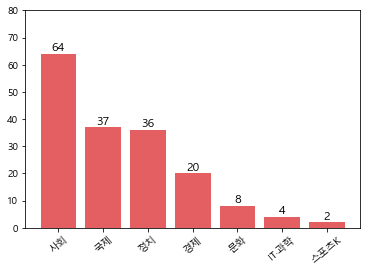

In [65]:
x = top10_label
y = df_data.label.value_counts().tolist()[:10]
bar = plt.bar(x, y, color = '#e35f62')
plt.ylim(0,80)
plt.xticks(rotation=40)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 12)

plt.show()

### 특정 카테고리 뉴스 키워드 추출

In [67]:
#- 정치 뉴스
poli_content = df_data[df_data['label'] == '정치']

In [68]:
#- 한글 이외의 문자 제거
import re
poli_content['content'] = poli_content['content'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))


C:\Users\331\AppData\Local\Temp\ipykernel_9588\3483425470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poli_content['content'] = poli_content['content'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))


In [70]:
import jpype
from konlpy.tag import Okt
okt = Okt()

poli_content_nouns = []
for cmt in poli_content['content']:
    poli_content_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
poli_content_nouns2 = []
word = [w for w in poli_content_nouns if len(w) > 1]  
poli_content_nouns2.extend(word)

In [71]:
poli_content_nouns2

['여야',
 '원내대표',
 '김진표',
 '국회의장',
 '주재',
 '후반기',
 '국회',
 '구성',
 '문제',
 '논의',
 '합의',
 '다만',
 '제헌절',
 '이전',
 '구성',
 '협상',
 '마무리',
 '공감',
 '의장',
 '국민',
 '권성동',
 '대표',
 '직무',
 '대행',
 '원내대표',
 '민주당',
 '박홍근',
 '원내대표',
 '오늘',
 '오전',
 '국회의장',
 '시간',
 '가량',
 '대화',
 '국민',
 '박형수',
 '대변인',
 '회동',
 '기자',
 '원칙',
 '제헌절',
 '이전',
 '구성',
 '협상',
 '마무리',
 '부분',
 '원내대표',
 '국회의장',
 '일정',
 '부분',
 '공감',
 '논의',
 '효율',
 '진행',
 '위해',
 '구성',
 '협상',
 '이외',
 '사법',
 '개혁',
 '특별',
 '위원회',
 '참여',
 '여러',
 '다른',
 '전제',
 '조건',
 '부분',
 '국회의장',
 '여야',
 '원내대표',
 '동하',
 '상임',
 '위원회',
 '배분',
 '수석',
 '끼리',
 '얘기',
 '전체',
 '일괄',
 '타결',
 '설명',
 '비공개',
 '일부',
 '고성',
 '대해',
 '과거',
 '사개특위',
 '문제',
 '수완',
 '검찰',
 '수사권',
 '완전',
 '박탈',
 '문제',
 '얘기',
 '바람',
 '민주당',
 '이수진',
 '원내',
 '대변인',
 '역시',
 '국회의장',
 '지금',
 '시기',
 '경제위기',
 '상황',
 '상반기',
 '무역적자',
 '외환보유고',
 '문제',
 '제헌절',
 '이전',
 '구성',
 '합의',
 '국민',
 '국회',
 '역할',
 '말씀',
 '박홍근',
 '원내대표',
 '가까이',
 '국회',
 '공전',
 '상황',
 '민생',
 '회복',
 '이견',
 '저희',
 '법사',
 '위원장',
 '자리',
 '양보',
 '국회',
 '선진',
 

In [74]:
#- 빈도 수
from collections import Counter
poli_word_count = Counter(poli_content_nouns2)

poli_word_count

Counter({'여야': 2,
         '원내대표': 19,
         '김진표': 1,
         '국회의장': 5,
         '주재': 1,
         '후반기': 1,
         '국회': 21,
         '구성': 11,
         '문제': 13,
         '논의': 8,
         '합의': 5,
         '다만': 2,
         '제헌절': 3,
         '이전': 5,
         '협상': 4,
         '마무리': 2,
         '공감': 5,
         '의장': 2,
         '국민': 36,
         '권성동': 7,
         '대표': 40,
         '직무': 14,
         '대행': 23,
         '민주당': 21,
         '박홍근': 4,
         '오늘': 40,
         '오전': 5,
         '시간': 12,
         '가량': 3,
         '대화': 2,
         '박형수': 1,
         '대변인': 11,
         '회동': 2,
         '기자': 4,
         '원칙': 1,
         '부분': 9,
         '일정': 6,
         '효율': 1,
         '진행': 7,
         '위해': 10,
         '이외': 1,
         '사법': 2,
         '개혁': 4,
         '특별': 9,
         '위원회': 12,
         '참여': 4,
         '여러': 6,
         '다른': 3,
         '전제': 1,
         '조건': 2,
         '동하': 1,
         '상임': 1,
         '배분': 1,
         '수석': 2,


In [75]:
#- 상위 20개만 출력
max = 20
poli_top_20 = {}
for word, counts in poli_word_count.most_common(max):
    poli_top_20[word] = counts
    print(f'{word} : {counts}')

대통령 : 49
사진 : 42
대표 : 40
오늘 : 40
의원 : 37
국민 : 36
정부 : 33
북한 : 32
대통령실 : 32
출처 : 31
대해 : 30
윤석열 : 29
연합뉴스 : 28
관련 : 28
대행 : 23
국회 : 21
민주당 : 21
보고 : 20
어민 : 20
원내대표 : 19


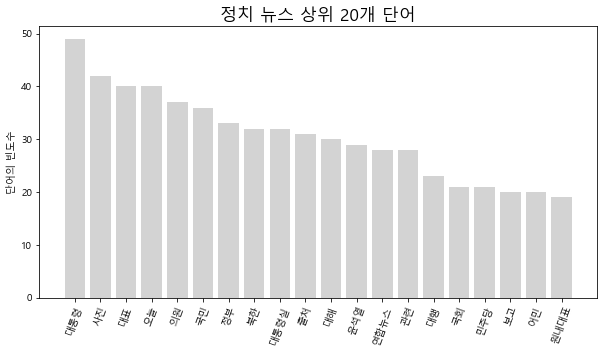

In [77]:
#- 형태소 시각화
plt.figure(figsize=(10, 5))
plt.title('정치 뉴스 상위 %d개 단어' % max, fontsize=17)    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in poli_top_20.items():
    plt.bar(key, value, color='lightgrey') 
plt.show()

### + wordcloud 생성

In [78]:
from wordcloud import WordCloud

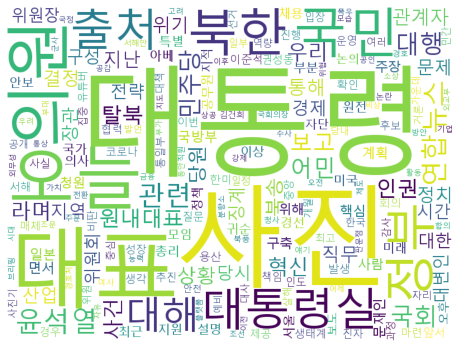

In [79]:
wc = WordCloud(font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(poli_word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()